# Analyzing AirBnB Data of Vienna

In this notebook, I follow the Data Analytics guidlines of data collection, cleaning, evaluating, and visualising. Also, I added some Data Science elements like clustering and simple regression models. In the end, I made a heatmap of Vienna to visualise some of the regression results. 

## Loading packages and data

In [1]:
#%pip install seaborn  # install any missing packages
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn import tree #Might not be necessary
from sklearn.linear_model import LinearRegression

In [2]:
# we load the data first
filepath = "./Data/AirBnB.csv"

# specify the delimeter correctly
airbnbdata = pd.read_csv(filepath, sep=",", encoding='latin')

This loads the data about the AirBnB apartments in Vienna in March 2022. The variable explanations are provided in a seperate excel sheet. 

## Exploration and Cleaning

In this step, I explore the data by using numerical and visual summaries, check what quick insights I get, and clean the data. 

In [3]:
airbnbdata.head()

,id,listing_url,name,picture_url,host_url,host_since,host_thumbnail_url,host_picture_url,host_neighbourhood,host_total_listings_count,...,number_of_reviews_ltm,first_review,last_review,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,dataset$price
0,53637555,https://www.airbnb.com/rooms/53637555,Gesammte Unterkunft näher Centrum und U-6,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/434354916,2021-12-02,https://a0.muscache.com/im/pictures/user/3418d...,https://a0.muscache.com/im/pictures/user/3418d...,NaN,6.0,...,1,2022-01-03,2022-01-03,2.0,1.00,False,5,0,0.44,$45.00
1,552092671665679104,https://www.airbnb.com/rooms/552092671665679084,lovely apartment in vienna,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/280891183,2019-07-31,https://a0.muscache.com/im/pictures/user/33408...,https://a0.muscache.com/im/pictures/user/33408...,NaN,5.0,...,0,NaN,NaN,NaN,NaN,True,0,0,NaN,$142.00
2,3109829,https://www.airbnb.com/rooms/3109829,Spacious Attic Apartment on 2 storeys,https://a0.muscache.com/pictures/0d9b5780-3706...,https://www.airbnb.com/users/show/4615178,2013-01-07,https://a0.muscache.com/im/pictures/user/031e7...,https://a0.muscache.com/im/pictures/user/031e7...,Alsergrund,9.0,...,2,2015-01-04,2022-02-27,4.5,4.67,False,0,0,0.07,$98.00
3,33304800,https://www.airbnb.com/rooms/33304800,Gorgeous and large family apartment,https://a0.muscache.com/pictures/a0227463-1a1b...,https://www.airbnb.com/users/show/5943952,2013-04-15,https://a0.muscache.com/im/pictures/user/f9aa1...,https://a0.muscache.com/im/pictures/user/f9aa1...,Währing,2.0,...,0,2019-07-27,2019-07-27,5.0,5.00,False,0,0,0.03,$100.00
4,28237854,https://www.airbnb.com/rooms/28237854,Flat in urban area next to Westbahnhof,https://a0.muscache.com/pictures/03612143-e419...,https://www.airbnb.com/users/show/22000815,2014-10-01,https://a0.muscache.com/im/pictures/user/6b78f...,https://a0.muscache.com/im/pictures/user/6b78f...,Rudolfsheim-Fünfhaus,2.0,...,0,NaN,NaN,NaN,NaN,False,0,0,NaN,$30.00


In [4]:
airbnbdata.describe()

,id,host_total_listings_count,longitude,bedrooms,minimum_nights,maximum_maximum_nights,availability_60,availability_365,number_of_reviews_ltm,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.161000e+03,9158.000000,9161.000000,8184.00000,9161.000000,9.161000e+03,9161.000000,9161.000000,9161.000000,7310.000000,7309.000000,9161.000000,9161.000000,7405.000000
mean,1.642132e+16,32.079821,16.360907,1.38783,6.956337,9.384666e+05,20.724048,144.944111,5.826329,4.731607,4.681743,2.070407,0.023142,1.061704
std,9.444197e+16,282.443444,0.035209,1.02427,29.634057,4.486598e+07,22.437186,138.801975,13.083752,0.373738,0.413403,9.146214,0.216939,1.474908
min,1.588300e+04,0.000000,16.193980,1.00000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.627941e+07,1.000000,16.338990,1.00000,1.000000,1.800000e+02,0.000000,0.000000,0.000000,4.630000,4.600000,0.000000,0.000000,0.150000
50%,3.082387e+07,2.000000,16.358160,1.00000,2.000000,1.125000e+03,12.000000,102.000000,0.000000,4.820000,4.780000,0.000000,0.000000,0.500000
75%,4.397869e+07,7.000000,16.381054,2.00000,3.000000,1.125000e+03,40.000000,286.000000,6.000000,5.000000,4.920000,1.000000,0.000000,1.480000
max,5.781258e+17,3750.000000,16.546620,19.00000,1125.000000,2.147484e+09,60.000000,365.000000,528.000000,5.000000,5.000000,75.000000,5.000000,47.140000


In [5]:
print('Number of columns :', airbnbdata.shape[1])
print('Number of rows :', airbnbdata.shape[0])

Number of columns : 31
Number of rows : 9161


### General dataset cleaning

In [6]:
# Making a copy of the data and dropping some variables
df = airbnbdata
df = df.drop(['id','name','listing_url','picture_url', 'host_url', 'host_thumbnail_url',\
'host_picture_url','maximum_maximum_nights', 'calculated_host_listings_count_private_rooms',\
'calculated_host_listings_count_shared_rooms', 'host_total_listings_count', 'longitude'], inplace=False, axis=1)

In [7]:
df.rename(columns = {'dataset$price':'price', 'host_neighbourhood': 'district'}, inplace = True)

In [8]:
df.head()

,host_since,district,host_has_profile_pic,host_identity_verified,property_type,bathrooms_text,bedrooms,amenities,minimum_nights,availability_60,availability_365,number_of_reviews_ltm,first_review,last_review,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,price
0,2021-12-02,NaN,True,True,Entire rental unit,1.5 baths,2.0,"[""Body soap"", ""Shower gel"", ""Dining table"", ""S...",1,46,351,1,2022-01-03,2022-01-03,2.0,1.00,False,0.44,$45.00
1,2019-07-31,NaN,True,True,Entire condominium (condo),1 bath,NaN,"[""Body soap"", ""Coffee maker"", ""Shower gel"", ""D...",3,58,88,0,NaN,NaN,NaN,NaN,True,NaN,$142.00
2,2013-01-07,Alsergrund,True,True,Entire serviced apartment,1 bath,3.0,"[""Coffee maker"", ""Dishwasher"", ""Shampoo"", ""Hot...",6,0,96,2,2015-01-04,2022-02-27,4.5,4.67,False,0.07,$98.00
3,2013-04-15,Währing,True,True,Entire rental unit,1.5 baths,3.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Kit...",7,0,0,0,2019-07-27,2019-07-27,5.0,5.00,False,0.03,$100.00
4,2014-10-01,Rudolfsheim-Fünfhaus,True,False,Entire rental unit,1 bath,1.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Hea...",4,0,0,0,NaN,NaN,NaN,NaN,False,NaN,$30.00


In [9]:
df.district.unique()

array([nan, 'Alsergrund', 'Währing', 'Rudolfsheim-Fünfhaus', 'Döbling',
       'Ottakring', 'Innere Stadt', 'Josefstadt', 'Neubau', 'Mariahilf',
       'Landstraße', 'Penzing', 'Meidling', 'Donaustadt', 'Brigittenau',
       'New Cross', 'Favoriten', 'Wieden', 'Hernals', 'Margareten',
       'Leopoldstadt', 'Heitzing', 'Simmering', 'Liesing', 'Floridsdorf',
       'Schöneberg', 'Schwabing - West', 'Neos Kosmos', 'Sathorn',
       'Neukölln', 'Santos-o-Velho', 'Staria Grad', 'Belgrano',
       'Quaid Block', 'Kreuzberg', 'Little Italy', 'Pena', 'Gramada',
       'Erzsébetváros - District VII.'], dtype=object)

In [10]:
df.district = df.district.fillna('Not-given')

In [11]:
df['district'].value_counts()

Not-given                        2948
Leopoldstadt                      784
Landstraße                        460
Rudolfsheim-Fünfhaus              436
Margareten                        434
Alsergrund                        415
Innere Stadt                      393
Favoriten                         380
Neubau                            371
Ottakring                         321
Wieden                            271
Mariahilf                         248
Meidling                          215
Brigittenau                       199
Josefstadt                        197
Hernals                           178
Währing                           174
Penzing                           157
Donaustadt                        150
Heitzing                          119
Döbling                           108
New Cross                          52
Floridsdorf                        49
Simmering                          48
Liesing                            35
Sathorn                             4
Schöneberg  

In the following code I list the districts in vienna and only take these for the dataframe

In [12]:
vienna_districts = ['Innere Stadt','Leopoldstadt','Landstraße','Wieden','Margareten','Mariahilf','Neubau'\
,'Josefstadt','Alsergrund','Favoriten','Simmering','Meidling','Hietzing','Penzing','Rudolfsheim-Fünfhaus'\
,'Ottakring','Hernals','Währing','Döbling','Brigittenau','Floridsdorf','Donaustadt','Liesing', 'Not-given']
# I also include "Not-given" in the districts, to make the next line more readable
df = df.loc[df['district'].isin(vienna_districts)].copy()
#df = df[df.district.isin(vienna_districts)]

In [13]:
df['district'].value_counts()
df.shape[0]

8971

In [14]:
df.host_has_profile_pic = df.host_has_profile_pic.astype('bool') 
df.host_identity_verified = df.host_identity_verified.astype('bool')

##### Other specific variable cleaning

In [15]:
# Datetime format for the dates
df[["host_since","first_review", "last_review"]] = \
df[["host_since","first_review", "last_review"]].apply(pd.to_datetime)

In [16]:
df["price"] = df["price"].str.replace('$', '', regex=True)
df["price"] = df["price"].str.replace(',', '', regex=True)

In [17]:
# price to numeric
df["price"] = pd.to_numeric(df['price'], errors='coerce')

##### Dealing with the bathrooms_text column.

In [18]:
#We need to understand which types of values we have in the column (missing numbers in front)
df['bathrooms_text'].value_counts()

1 bath               5265
1.5 baths            1513
1 shared bath        1012
1.5 shared baths      288
1 private bath        247
2 baths               236
2.5 baths              95
2 shared baths         79
Half-bath              36
2.5 shared baths       33
3 shared baths         31
3 baths                31
4 shared baths         15
3.5 baths              14
Shared half-bath       13
3.5 shared baths       10
4 baths                 7
4.5 baths               6
0 shared baths          6
0 baths                 5
Private half-bath       4
5 baths                 4
6 baths                 3
8 baths                 2
11 baths                2
15 baths                1
7 baths                 1
18 shared baths         1
9 baths                 1
7.5 baths               1
Name: bathrooms_text, dtype: int64

In [19]:
# Making sure there is always a number in from of the string so the split works
df["bathrooms_text"] = df["bathrooms_text"].replace(\
{"Half-bath": "0.5 Half-bath", \
"Shared half-bath": "0.5 Shared half-bath",\
"Private half-bath" : "0.5 Private half-bath"}, inplace=False)

In [20]:
# Creating column bathroom_qty and bathroom_type
df["bathroom_qty"] = df["bathrooms_text"].str.split(" ", expand=True)[0]
df["bathroom_type"] = df["bathrooms_text"].str.split(" ", expand=True)[1]
df["bathroom_qty"] = pd.to_numeric(df['bathroom_qty'], errors='coerce')
df['bathroom_type'] = pd.Categorical(df.bathroom_type)

In [21]:
# We safe the size of the current df in a variable 
# Because in a next step we will expand it and will need the original size
dfsize = df.shape[1]

In [22]:
# We list the amenities that exists
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
len(amenities_set)
amenities_set

{'',
 '- body soap',
 '- oven',
 '- refrigerator',
 '109\\ HDTV',
 '120\\ HDTV',
 '130\\ HDTV with premium cable',
 '14\\ TV',
 '2 Herdplatten stainless steel electric stove',
 '2 Platten stainless steel electric stove',
 '2-5 years old',
 '23\\ TV',
 '28\\ HDTV with standard cable',
 '32\\ HDTV',
 '32\\ HDTV with Amazon Prime Video',
 '32\\ HDTV with Netflix',
 '32\\ HDTV with standard cable',
 '32\\ TV',
 '32\\ TV with Netflix',
 '32\\ TV with standard cable',
 '33\\ HDTV with Netflix',
 '36\\ HDTV with Netflix',
 '36\\ TV',
 '37\\ TV',
 '37\\ TV with Netflix',
 '39\\ HDTV with Netflix',
 '3\\ HDTV with Netflix',
 '40\\ HDTV',
 '40\\ HDTV with Amazon Prime Video',
 '40\\ HDTV with Netflix',
 '40\\ HDTV with premium cable',
 '40\\ HDTV with standard cable',
 '40\\ TV',
 '41\\ HDTV with Amazon Prime Video',
 '42\\ HDTV',
 '42\\ HDTV with Amazon Prime Video',
 '42\\ HDTV with Apple TV',
 '42\\ HDTV with Chromecast',
 '42\\ HDTV with Netflix',
 '42\\ HDTV with premium cable',
 '42\\ HDTV

#### Dealing with the amenities column

What the following code does:
- Group some of the amenities into groups with similar attributes (eg. Soap and Shampoo will become soap group)
- Create a column for each of this group and fill it with 1 when that apparment has it (creating dummy variables)
- fill all the rest with 0 (df size needed to do this operation on the newly created columns)
- Drop the amenities which affect less than 10% of the data, and see what amenities aren't considered
- Check which ones are kept

In [23]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV|Smart TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Kitchen|kitchenette|kitchen', case = False), 'kitchen'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Soap|shampoo|conditioner', case = False), 'soaps'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/var/folders/2g/mmrh97td0m70h3qg8l_5gcbr0000gn/T/ipykernel_94620/4125246156.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [24]:
df.head()

,host_since,district,host_has_profile_pic,host_identity_verified,property_type,bathrooms_text,bedrooms,amenities,minimum_nights,availability_60,...,kitchen,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,soaps,accessible,event_suitable
0,2021-12-02,Not-given,True,True,Entire rental unit,1.5 baths,2.0,"[""Body soap"", ""Shower gel"", ""Dining table"", ""S...",1,46,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1,2019-07-31,Not-given,True,True,Entire condominium (condo),1 bath,NaN,"[""Body soap"", ""Coffee maker"", ""Shower gel"", ""D...",3,58,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,2013-01-07,Alsergrund,True,True,Entire serviced apartment,1 bath,3.0,"[""Coffee maker"", ""Dishwasher"", ""Shampoo"", ""Hot...",6,0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,2013-04-15,Währing,True,True,Entire rental unit,1.5 baths,3.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Kit...",7,0,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,2014-10-01,Rudolfsheim-Fünfhaus,True,False,Entire rental unit,1 bath,1.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Hea...",4,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [25]:
# Replacing nulls with zeros for new amenities columns
cols_to_replace_nulls = df.iloc[:,dfsize:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,dfsize:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

['check_in_24h', 'high_end_electronics', 'bbq', 'balcony', 'nature_and_views', 'breakfast', 'gym', 'child_friendly', 'outdoor_space', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [26]:
# These are the amenity columns I kept
df.columns[dfsize:]

Index(['air_conditioning', 'bed_linen', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'parking', 'host_greeting',
       'internet', 'kitchen', 'long_term_stays', 'private_entrance', 'soaps'],
      dtype='object')

##### Dealing with the property type

In [27]:
df['property_type'].value_counts()

Entire rental unit                     5621
Private room in rental unit            1719
Entire condominium (condo)              448
Entire serviced apartment               237
Entire loft                             123
Private room in condominium (condo)      85
Room in boutique hotel                   71
Entire condo                             70
Private room in hostel                   57
Entire residential home                  55
Room in hotel                            47
Private room in residential home         47
Private room in condo                    43
Shared room in rental unit               41
Private room in bed and breakfast        35
Private room in home                     30
Entire home                              21
Private room in loft                     21
Room in serviced apartment               20
Entire guest suite                       17
Room in aparthotel                       16
Private room in townhouse                14
Private room in guesthouse      

In [28]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
'Entire place': 'House',                       
'Entire serviced apartment': 'Apartment',
'Entire rental unit' : 'Apartment',
'Entire condominium' : 'Apartment',
'Entire condo' : 'Apartment',
'Entire condo' : 'Apartment',
'Entire villa': 'House',                          
'Entire vacation home': 'House',                                   
'Entire bungalow' :'House',                                                       
'Entire guesthouse':'House',                                           
'Camper/RV': 'Other',                            
'Entire hostel': 'Apartament',                                      
'Casa particul':'House',                                   
'Entire chalet': 'House',
         }, inplace=True)                 
              
# Replacing other categories with 'Room'
df.loc[~df.property_type.isin(['House', 'Apartment','Hotel','Other']), 'property_type'] = 'Room'

In [29]:
df.head()

,host_since,district,host_has_profile_pic,host_identity_verified,property_type,bathrooms_text,bedrooms,amenities,minimum_nights,availability_60,...,cooking_basics,white_goods,elevator,parking,host_greeting,internet,kitchen,long_term_stays,private_entrance,soaps
0,2021-12-02,Not-given,True,True,Apartment,1.5 baths,2.0,"[""Body soap"", ""Shower gel"", ""Dining table"", ""S...",1,46,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,2019-07-31,Not-given,True,True,Room,1 bath,NaN,"[""Body soap"", ""Coffee maker"", ""Shower gel"", ""D...",3,58,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,2013-01-07,Alsergrund,True,True,Apartment,1 bath,3.0,"[""Coffee maker"", ""Dishwasher"", ""Shampoo"", ""Hot...",6,0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,2013-04-15,Währing,True,True,Apartment,1.5 baths,3.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Kit...",7,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2014-10-01,Rudolfsheim-Fünfhaus,True,False,Apartment,1 bath,1.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Hea...",4,0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [30]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")


Null values in 'first_review': 18.7%


### Visualizing the data

In [31]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2022,3, 1) - df.first_review).astype('timedelta64[D]')

<AxesSubplot:>

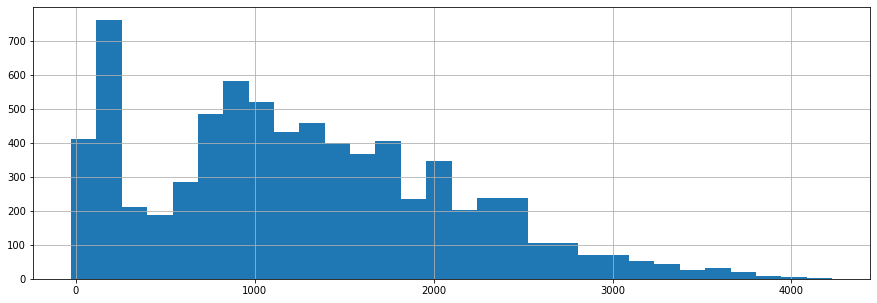

In [32]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30)

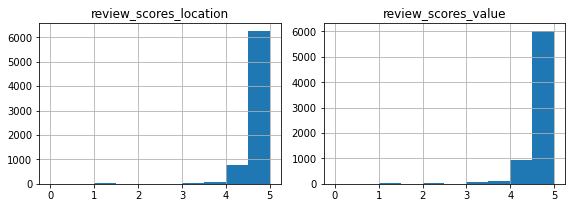

In [33]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

It looks to us we have a biased review sample, for the most part.

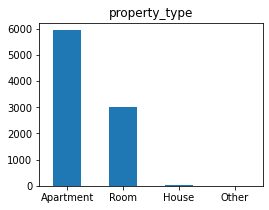

Apartment    0.660796
Room         0.334745
House        0.004236
Other        0.000223
Name: property_type, dtype: float64


In [34]:
# A visualization to get an overview how the type of the properties are in the AirBnB data
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()


for col in ['property_type']:
    category_count_plot(col, figsize=(4,3))
    print(df[col].value_counts(normalize=True))

<AxesSubplot:xlabel='count', ylabel='district'>

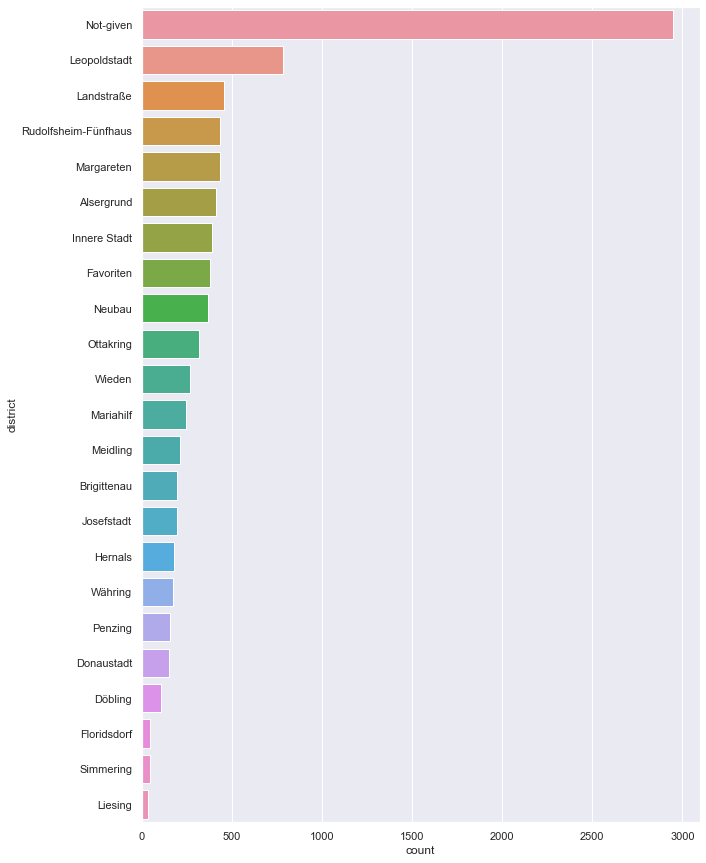

In [35]:
# Getting an overview in which districts are most of the properties in our data set spread
sns.set(rc={'figure.figsize':(10,15)})
sns.countplot(y="district", data=df, order=df["district"].value_counts().index)

## Building clusters of AirBnB offers 

1) Defining which variables are used in the clustering
2) Defining similarity of variables
3) Building the clusters (and deciding the number of cluseters)
4) Exploring the cluster properties 

### Data preparation for clustering

First, I start with including the following variables for clustering.

In [36]:
chosenft = ['price','availability_365', 'number_of_reviews_ltm','bedrooms','review_scores_location']
clusterdf = df[chosenft]

In [37]:
from scipy import stats

clusterdf = clusterdf[np.abs(clusterdf.price-clusterdf.price.mean()) <= (3*clusterdf.price.std())]

#z_scores = stats.zscore(clusterdf['price'])
#calculate z-scores of price of`clusterdf`

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#clusterdf['price'] = clusterdf[filtered_entries]


In [38]:
# The StandardScaler transforms the variable into having a mean of 0 and a standard deviation of 1

standard_scaler = StandardScaler()

clusterdf_scaled = pd.DataFrame(data = clusterdf)
clusterdf_scaled[chosenft] = standard_scaler.fit_transform(clusterdf[chosenft]) 

# the MinMaxScaler will transform the variable onto the range of [0, 1]
#min_max_scaler = MinMaxScaler()
#df["Actual Loan Time Scaled_min_max"] = min_max_scaler.fit_transform(lib_loan[["Actual Loan Time"]]) 

In [39]:
clusterdf_scaled.head()

,price,availability_365,number_of_reviews_ltm,bedrooms,review_scores_location
0,-0.473380,1.510568,-0.373229,0.628904,-7.300113
1,1.142531,-0.395378,-0.448909,NaN,NaN
2,0.409541,-0.337403,-0.297548,1.641170,-0.617373
3,0.442858,-1.033109,-0.448909,1.641170,0.719175
4,-0.723263,-1.033109,-0.448909,-0.383363,NaN


<AxesSubplot:xlabel='availability_365', ylabel='price'>

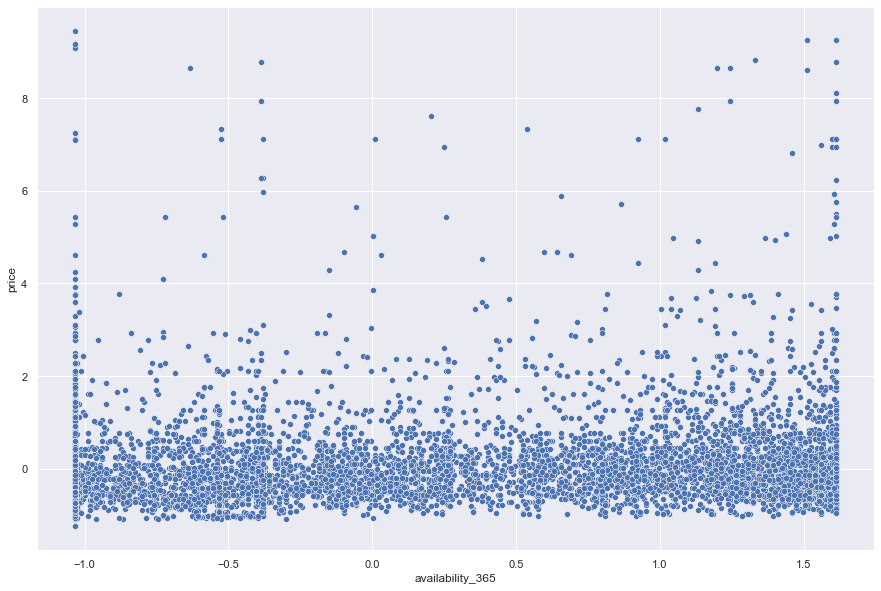

In [40]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=clusterdf_scaled, x="availability_365", y="price")

In [41]:
# Dropping any NAs here as kmeans does not handle NA values
clusterdf_scaled_nona = clusterdf_scaled.dropna(
    subset=["bedrooms","review_scores_location"]
).reset_index()

X = clusterdf_scaled_nona[chosenft].values


In [42]:
clusterdf_scaled_nona.head()

,index,price,availability_365,number_of_reviews_ltm,bedrooms,review_scores_location
0,0,-0.473380,1.510568,-0.373229,0.628904,-7.300113
1,2,0.409541,-0.337403,-0.297548,1.641170,-0.617373
2,3,0.442858,-1.033109,-0.448909,1.641170,0.719175
3,6,-0.540015,1.380123,0.989028,-0.383363,-0.430256
4,7,0.376223,1.612025,-0.448909,0.628904,-0.162947


### K-means cluster model building

Deciding on the number of clusters that will be included.

In [43]:
sum_of_squares = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    sum_of_squares.append(kmeans.inertia_)

/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

In [44]:
sum_of_squares_frame = pd.DataFrame({"K":K, "sum_of_squares": sum_of_squares})
sum_of_squares_frame

,K,sum_of_squares
0,1,30557.256454
1,2,24653.402543
2,3,20793.622594
3,4,17668.905775
4,5,14729.586500
5,6,12198.417504
6,7,10931.664218
7,8,9782.210865
8,9,9139.927378


In [45]:
kmeans.cluster_centers_

array([[-4.08330312e-01, -8.40293725e-01, -2.93269854e-01,
        -3.65724891e-01,  2.41425867e-01],
       [-3.71843634e-02,  1.08645024e+00, -4.97908293e-02,
        -1.88564670e-01,  1.65593746e-01],
       [-3.21044167e-01, -2.11445304e-01, -2.04312692e-01,
        -1.37495323e-01, -1.96070615e+00],
       [ 1.97320530e+00,  5.86474228e-01,  1.96111221e-02,
         9.92988723e-01,  3.16535401e-01],
       [ 3.04414751e-01, -5.60452133e-01, -1.11654972e-01,
         7.98598525e-01,  2.23210517e-01],
       [-1.62285101e-01,  2.03298119e-01,  2.32781764e+00,
        -1.10286562e-01,  5.98113484e-02],
       [-4.82913616e-02,  9.20127244e-03, -4.07154461e-01,
        -1.73928680e-01, -9.42015498e+00],
       [ 6.33093814e+00,  4.31135874e-01, -1.09606660e-01,
         1.92797943e+00, -8.63179051e-02],
       [-5.30143511e-01,  1.23437915e+00,  1.73355892e-01,
         1.08265548e+01, -1.53046304e-01]])

In [46]:
# Information which observation belongs to which cluster, and also the cluster center information
# the labels are the cluster id's for each observation
kmeans.labels_

array([6, 4, 4, ..., 1, 5, 1], dtype=int32)

In [47]:
# With that I see the distribution of the data points in each cluster
Counter(kmeans.labels_)

Counter({6: 29,
         4: 683,
         1: 1772,
         0: 2356,
         3: 368,
         5: 645,
         2: 456,
         7: 60,
         8: 27})

<AxesSubplot:xlabel='K', ylabel='sum_of_squares'>

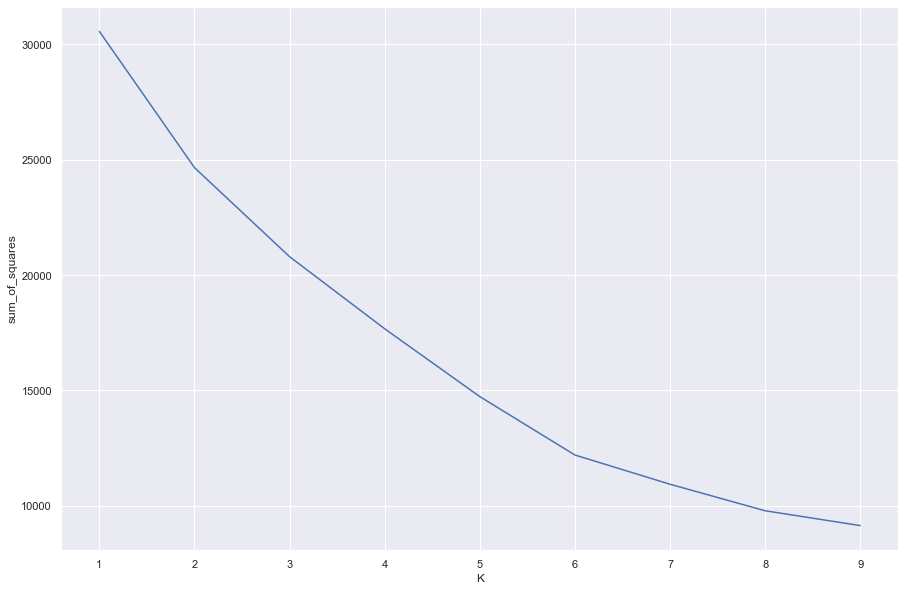

In [48]:
# Plotting the sum of squares to visualise the optimal number of clusters
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(data=sum_of_squares_frame, x="K", y="sum_of_squares")

In [49]:
plot_data = clusterdf[chosenft].dropna()
plot_data["Cluster"] = kmeans.labels_

plot_data.head()

,price,availability_365,number_of_reviews_ltm,bedrooms,review_scores_location,Cluster
0,-0.473380,1.510568,-0.373229,0.628904,-7.300113,6
2,0.409541,-0.337403,-0.297548,1.641170,-0.617373,4
3,0.442858,-1.033109,-0.448909,1.641170,0.719175,4
6,-0.540015,1.380123,0.989028,-0.383363,-0.430256,1
7,0.376223,1.612025,-0.448909,0.628904,-0.162947,1


Visualizing the cluster and gettting any useful observation for it.

/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='availability_365', ylabel='price'>

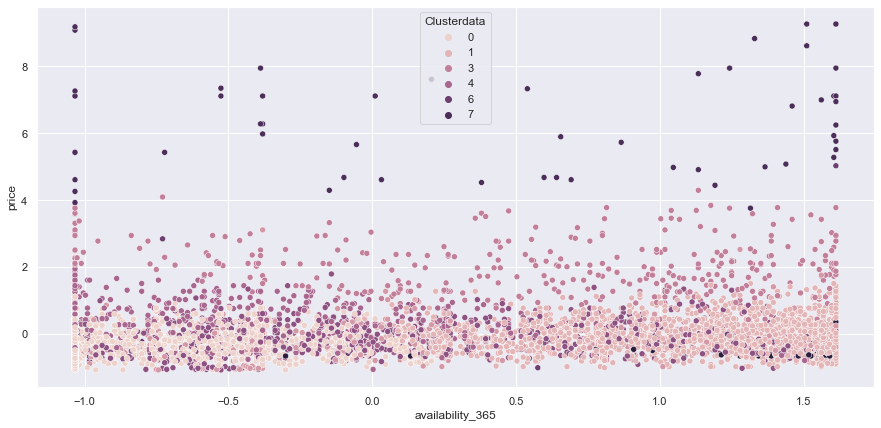

In [50]:
n_cluster = 9
kmeans = KMeans(n_clusters=n_cluster, random_state=1).fit(X)
plot_data["Clusterdata"] = kmeans.labels_
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(data=plot_data, x="availability_365", y="price", hue="Clusterdata")

### Davies-Bouldin score&nbsp;clustering model 

Here I decided to include also another way of determining the number of clusters.

In [51]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
K = range(2,10)

for k in K:
    print("current number of clusters: ", k)
    kmeans_preds = KMeans(n_clusters=k).fit_predict(X)
    print("calculating Davies-Bouldin score")
    db_scores.append(davies_bouldin_score(X, kmeans_preds))

current number of clusters:  2
calculating Davies-Bouldin score
current number of clusters:  3
calculating Davies-Bouldin score
current number of clusters:  4
calculating Davies-Bouldin score


/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


current number of clusters:  5
calculating Davies-Bouldin score
current number of clusters:  6
calculating Davies-Bouldin score
current number of clusters:  7


/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score
current number of clusters:  8
calculating Davies-Bouldin score
current number of clusters:  9


/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


calculating Davies-Bouldin score


In [52]:
db_scores

[1.588055982508025,
 1.3802308773594287,
 1.177437174117048,
 1.0594588077719045,
 0.9203034110026841,
 0.8712654366860463,
 0.9467834820924617,
 0.98392722502134]

<AxesSubplot:xlabel='K', ylabel='Davies-Bouldin Score'>

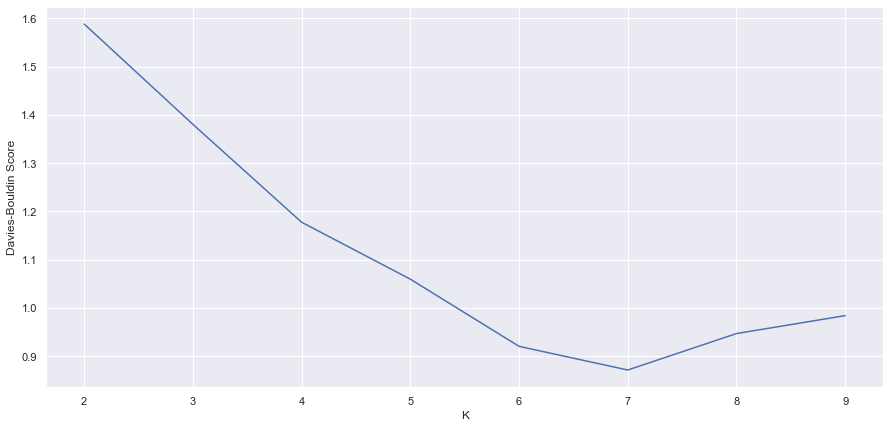

In [53]:
db_scores_frame = pd.DataFrame({"K":K, "Davies-Bouldin Score": db_scores})
sns.lineplot(data=db_scores_frame, x="K", y="Davies-Bouldin Score")

/Users/robinkulha/opt/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='availability_365', ylabel='price'>

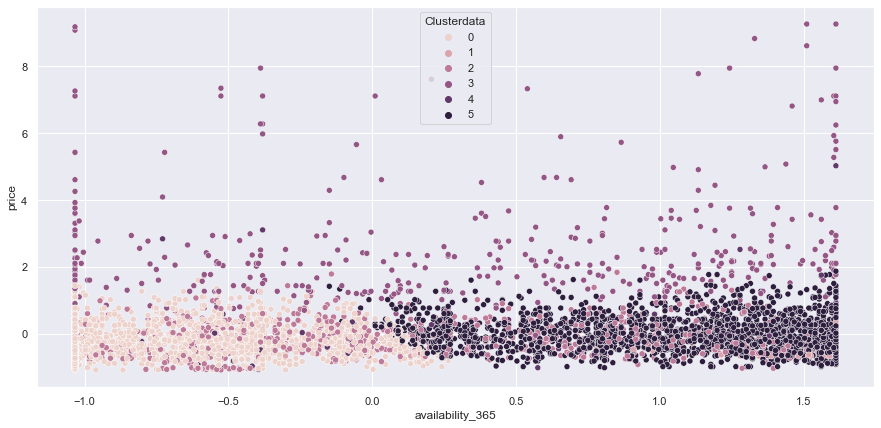

In [54]:
#re-building with the number of cluster 6 as it is shown from the DB score clustering 
n_cluster = 6
kmeans = KMeans(n_clusters=n_cluster, random_state=1).fit(X)
plot_data["Clusterdata"] = kmeans.labels_
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(data=plot_data, x="availability_365", y="price", hue="Clusterdata")

### Evaluation of cluster model 

The clusters taking into consideration do not predict the data accurately and are not that useful. It can be considered also other combinations for clustering and observe their results.

<AxesSubplot:xlabel='count', ylabel='bedrooms'>

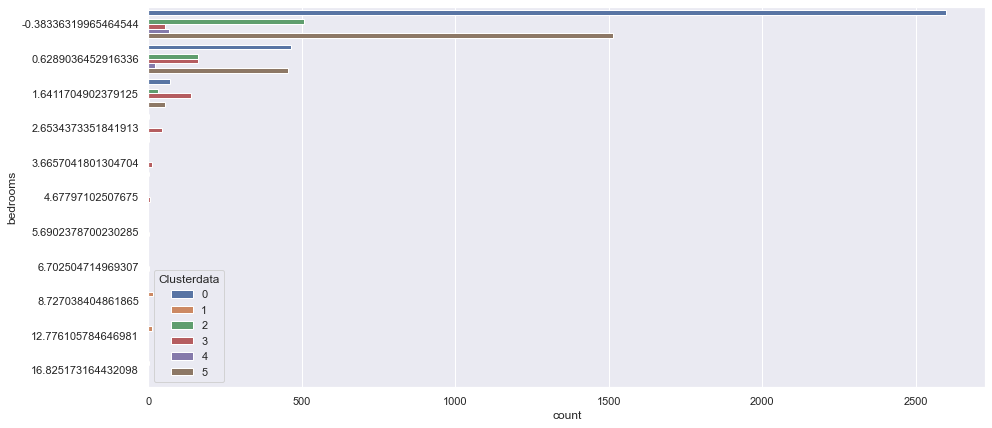

In [55]:
clusterdf_scaled_nona["Clusterdata"] = kmeans.labels_
sns.countplot(y="bedrooms", hue="Clusterdata", data=clusterdf_scaled_nona)

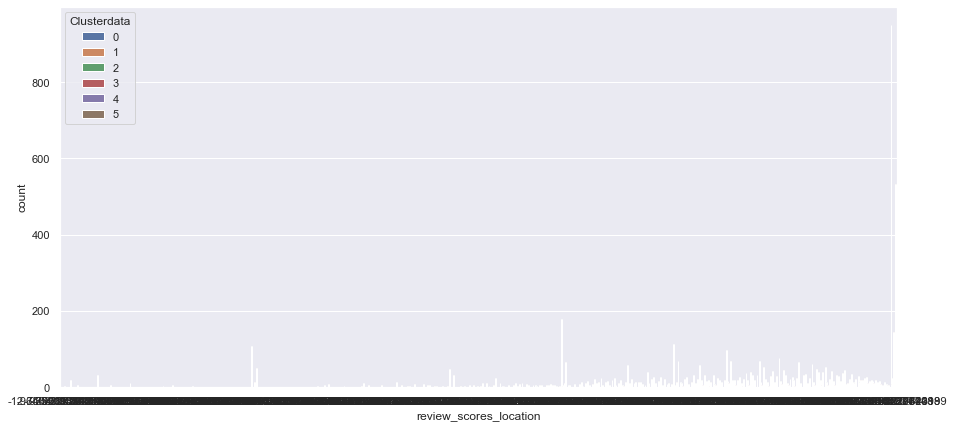

In [56]:
clusterdf_scaled_nona["Clusterdata"] = kmeans.labels_
sns.countplot(x="review_scores_location", hue="Clusterdata", data=clusterdf_scaled_nona)

sns.set(rc={'figure.figsize':(15,15)})

The clusters do not reveal many new insights. However, it allows to differenciate between low and high price offers, as well as high and low availability offers. 

## Regression Models: Predicting the price of AirBnB offers  

Here, I try to build a regression model for predicting the AirBnB price of the apartments, i.e., see if the listing price can be predicted as a function of apartment / listing features. For that, I use Linear and Logistic Regression Models. 

### Data preparation for Regression models

In [57]:
df.select_dtypes(include=np.number).columns.tolist()

['bedrooms',
 'minimum_nights',
 'availability_60',
 'availability_365',
 'number_of_reviews_ltm',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'price',
 'bathroom_qty',
 'air_conditioning',
 'bed_linen',
 'tv',
 'coffee_machine',
 'cooking_basics',
 'white_goods',
 'elevator',
 'parking',
 'host_greeting',
 'internet',
 'kitchen',
 'long_term_stays',
 'private_entrance',
 'soaps',
 'time_since_first_review']

In [58]:
df.head()

,host_since,district,host_has_profile_pic,host_identity_verified,property_type,bathrooms_text,bedrooms,amenities,minimum_nights,availability_60,...,white_goods,elevator,parking,host_greeting,internet,kitchen,long_term_stays,private_entrance,soaps,time_since_first_review
0,2021-12-02,Not-given,True,True,Apartment,1.5 baths,2.0,"[""Body soap"", ""Shower gel"", ""Dining table"", ""S...",1,46,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0
1,2019-07-31,Not-given,True,True,Room,1 bath,NaN,"[""Body soap"", ""Coffee maker"", ""Shower gel"", ""D...",3,58,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,NaN
2,2013-01-07,Alsergrund,True,True,Apartment,1 bath,3.0,"[""Coffee maker"", ""Dishwasher"", ""Shampoo"", ""Hot...",6,0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2613.0
3,2013-04-15,Währing,True,True,Apartment,1.5 baths,3.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Kit...",7,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,948.0
4,2014-10-01,Rudolfsheim-Fünfhaus,True,False,Apartment,1 bath,1.0,"[""Hangers"", ""Iron"", ""Wifi"", ""Essentials"", ""Hea...",4,0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN


In [59]:
df_reg = df.loc[:, ["bedrooms", 'minimum_nights','availability_60','availability_365',\
'number_of_reviews_ltm','review_scores_location','review_scores_value',\
'reviews_per_month','price','bathroom_qty']]
df_reg.dropna(inplace=True)

# dummy variables are created and the data is split using a randomly selected 80% of observations as training data, and 20% as test
df_reg = pd.get_dummies(df_reg)
training, test = train_test_split(df_reg, test_size=.2, random_state = 123)

X_train = training.loc[:,training.columns != "price"]
y_train = training[["price"]].values.ravel()

X_test = test.loc[:,test.columns != "price"]
y_test = test[["price"]].values.ravel()

### Regression Modelbuilding 1

First, I try to build a regression model with all numeric variables, to try and predict price

In [60]:
# The model parameters are estimated on the training data (fitting the model)
linear_reg = LinearRegression().fit(X_train, y_train)

# And then, the model predicts the outcome on the training and test sets
linear_reg_pred_train = linear_reg.predict(X_train) # for the training data
linear_reg_pred = linear_reg.predict(X_test) # for the test data

In [61]:
print("Mean Squared Error on the training set: ", mean_squared_error(y_train, linear_reg_pred_train))
print("R2 Score on the training set: ", r2_score(y_train, linear_reg_pred_train))

print("Mean Squared Error on the test set: ", mean_squared_error(y_test, linear_reg_pred))
print("R2 Score on the test set: ", r2_score(y_test, linear_reg_pred))

Mean Squared Error on the training set:  49574.121014167824
R2 Score on the training set:  0.017107449593467217
Mean Squared Error on the test set:  32219.004223762608
R2 Score on the test set:  0.02441284216844286


As I could have guessed, this model is terrible. 

### Regression Modelbuilding 2

Here I delete mainly the availabilty values out of the model, to see if that makes it better, but still bad.

In [62]:
df_reg = df.loc[:, ["bedrooms", 'minimum_nights',\
'review_scores_location','review_scores_value',\
'reviews_per_month','price','bathroom_qty']]
df_reg.dropna(inplace=True)

# dummy variables are created and the data is split using a randomly selected 80% of observations as training data, and 20% as test
df_reg = pd.get_dummies(df_reg)
training, test = train_test_split(df_reg, test_size=.2, random_state = 123)

X_train = training.loc[:,training.columns != "price"]
y_train = training[["price"]].values.ravel()

X_test = test.loc[:,test.columns != "price"]
y_test = test[["price"]].values.ravel()

In [63]:
linear_reg = LinearRegression().fit(X_train, y_train)

# The model predicts the outcome on the training and test sets
linear_reg_pred_train = linear_reg.predict(X_train) # for the training data
linear_reg_pred = linear_reg.predict(X_test) # for the test data

In [64]:
print("Mean Squared Error on the training set: ", mean_squared_error(y_train, linear_reg_pred_train))
print("R2 Score on the training set: ", r2_score(y_train, linear_reg_pred_train))

print("Mean Squared Error on the test set: ", mean_squared_error(y_test, linear_reg_pred))
print("R2 Score on the test set: ", r2_score(y_test, linear_reg_pred))

Mean Squared Error on the training set:  49607.05980875389
R2 Score on the training set:  0.016454381114274996
Mean Squared Error on the test set:  32232.59030457256
R2 Score on the test set:  0.024001457450547825


This model is similarly meaningless as the last one. 

### Regression Modelbuilding 3

As the previous models did not work well, this one will be simpler, meaning with less variables. 

In [65]:
df_reg = df.loc[:, ["bedrooms",'price','bathroom_qty']]
df_reg.dropna(inplace=True)

# dummy variables are created and the data is split using a randomly selected 80% of observations as training data, and 20% as test
df_reg = pd.get_dummies(df_reg)
training, test = train_test_split(df_reg, test_size=.2, random_state = 123)

X_train = training.loc[:,training.columns != "price"]
y_train = training[["price"]].values.ravel()

X_test = test.loc[:,test.columns != "price"]
y_test = test[["price"]].values.ravel()

In [66]:
linear_reg = LinearRegression().fit(X_train, y_train)

# The model predicts the outcome on the training and test sets
linear_reg_pred_train = linear_reg.predict(X_train) # for the training data
linear_reg_pred = linear_reg.predict(X_test) # for the test data

In [67]:
print("Mean Squared Error on the training set: ", mean_squared_error(y_train, linear_reg_pred_train))
print("R2 Score on the training set: ", r2_score(y_train, linear_reg_pred_train))

print("Mean Squared Error on the test set: ", mean_squared_error(y_test, linear_reg_pred))
print("R2 Score on the test set: ", r2_score(y_test, linear_reg_pred))

Mean Squared Error on the training set:  48933.578545363285
R2 Score on the training set:  0.021536185218578807
Mean Squared Error on the test set:  6647.658548768714
R2 Score on the test set:  0.0005066807015483565


This model is slightly less terrible, but still not actually able to predict the price reliably. After trying three times, I will conclude that a linear model is not the best for this task. 

### Building a Logistic Regression Model

Now, I want to build a logistic model that includes the existing amenities. Maybe with that information prices can be predicted.

In [68]:
# look at the amenities that are kept (except time_since_first_review)
df.columns[dfsize:-1]

Index(['air_conditioning', 'bed_linen', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'parking', 'host_greeting',
       'internet', 'kitchen', 'long_term_stays', 'private_entrance', 'soaps'],
      dtype='object')

In [69]:
df_log_reg = df.loc[:, ['air_conditioning', 'bed_linen', 'tv', 'coffee_machine',\
'cooking_basics', 'white_goods', 'elevator', 'parking', 'host_greeting',\
'internet', 'kitchen', 'long_term_stays', 'private_entrance', 'soaps',\
'reviews_per_month','price']]
df_log_reg.dropna(inplace=True)

# dummy variables are created and the data is split using a randomly selected 80% of observations as training data, and 20% as test
df_log_reg = pd.get_dummies(df_log_reg)
training, test = train_test_split(df_log_reg, test_size=.2, random_state = 123)

X_train = training.loc[:,training.columns != "price"]
y_train = training[["price"]].values.ravel()

X_test = test.loc[:,test.columns != "price"]
y_test = test[["price"]].values.ravel()

In [70]:
y, X = dmatrices('price ~ air_conditioning + bed_linen + tv + coffee_machine + cooking_basics + white_goods + elevator + parking + host_greeting + internet + kitchen + long_term_stays + private_entrance + soaps',\
 data=training, return_type='dataframe')

In [71]:
# specify using a standard "Ordinary Least Squares (OLS)" regression model
linear_reg = sm.OLS(y, X)    # Describe model

# and estimate the parameters based on the available data X and y
linear_reg_fit = linear_reg.fit()       # Fit model

In [72]:
print(linear_reg_fit.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     9.490
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           3.42e-21
Time:                        10:20:44   Log-Likelihood:                -38094.
No. Observations:                5833   AIC:                         7.622e+04
Df Residuals:                    5818   BIC:                         7.632e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           82.8142     15.757  

This actually gives interesting results. 
We can see that some amenities describe the price (dependent variable) quite well. With air_conditioning True, there is a 27.1390 units higher estimated price, given all other variables are being held constant. 

Most interestingly, a coffee_machine does not increase the offer's price, although not being statistically significant. This makes me doubt my analysis. 

What is also interesting is that the kitchen value is really low compared to all other variables.

### Logistic Regression Model 2

In a next step, I will see if simplifying the model, including less of the amenities can lead to better results.

In [73]:
y, X = dmatrices('price ~ air_conditioning + bed_linen + tv + white_goods + internet + coffee_machine',\
 data=training, return_type='dataframe')

In [74]:
# dummy variables are created and the data is split using a randomly selected 80% of observations as training data, and 20% as test
linear_reg = sm.OLS(y, X)    # Describe model

# and the parameters are estimated based on the available data X and y
linear_reg_fit = linear_reg.fit()       # Fit model

In [75]:
print(linear_reg_fit.summary())  # Summarize model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     15.80
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           4.33e-18
Time:                        10:20:44   Log-Likelihood:                -38113.
No. Observations:                5833   AIC:                         7.624e+04
Df Residuals:                    5826   BIC:                         7.629e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           69.1771     12.911  

This model is surprisingly similar, in terms of AIC and BIC score. Also, the coffee_machine variable is not positive, but still not statistically significant on a 95% confidence interval. air_conditioning still seems to be of utter most importance. 

However we can also see it is not an ideal model.

### Logistic Regression Model 3

As a last logistic model, I will try take the property type and district into account

In [76]:
df_log_reg = df.loc[:, ['district','property_type','price']]
df_log_reg.dropna(inplace=True)

# dummy variables are created and the data is split using a randomly selected 80% of observations as training data, and 20% as test
df_log_reg = pd.get_dummies(df_log_reg)
training, test = train_test_split(df_log_reg, test_size=.2, random_state = 123)

X_train = training.loc[:,training.columns != "price"]
y_train = training[["price"]].values.ravel()

X_test = test.loc[:,test.columns != "price"]
y_test = test[["price"]].values.ravel()

In [77]:
df_log_reg.rename(columns = {'district_Not-given':'district_na'}, inplace = True)

In [78]:
df_log_reg.select_dtypes(include=np.number).columns.tolist()

['price',
 'district_Alsergrund',
 'district_Brigittenau',
 'district_Donaustadt',
 'district_Döbling',
 'district_Favoriten',
 'district_Floridsdorf',
 'district_Hernals',
 'district_Innere Stadt',
 'district_Josefstadt',
 'district_Landstraße',
 'district_Leopoldstadt',
 'district_Liesing',
 'district_Margareten',
 'district_Mariahilf',
 'district_Meidling',
 'district_Neubau',
 'district_na',
 'district_Ottakring',
 'district_Penzing',
 'district_Rudolfsheim-Fünfhaus',
 'district_Simmering',
 'district_Wieden',
 'district_Währing',
 'property_type_Apartment',
 'property_type_House',
 'property_type_Other',
 'property_type_Room']

In [79]:
y, X = dmatrices('price ~ district_Alsergrund + district_Brigittenau + district_Donaustadt + district_Döbling +  district_Favoriten + district_Floridsdorf + district_Hernals + district_Josefstadt + district_Landstraße + district_Leopoldstadt + district_Liesing + district_Margareten +  district_Mariahilf + district_Meidling + district_Neubau + district_Ottakring + district_Penzing + district_Simmering + district_Wieden + district_Währing +  property_type_Apartment + property_type_House + property_type_Other + property_type_Room',\
 data=training, return_type='dataframe')

In [80]:
# using a standard "Ordinary Least Squares (OLS)" regression model
linear_reg = sm.OLS(y, X)    # Describe model

# and estimate the parameters based on the available data X and y
linear_reg_fit = linear_reg.fit()       # Fit model

In [81]:
print(linear_reg_fit.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.425
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           5.63e-08
Time:                        10:20:44   Log-Likelihood:                -47206.
No. Observations:                7176   AIC:                         9.446e+04
Df Residuals:                    7152   BIC:                         9.462e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Interestingly, this model shows, that the property type do not really differ in their  influence on the price, as all property variables show equal scores. 

We also see Wieden seeing a small positive impact (all other equal), while Simmering a stronger negative one (this result makes sense for people from Vienna). 

## Visualising Viennas districts on a map 

To present the results of the OLS regression, I wanted to make a heat map of the districts. This map shows the parameters that describe the price of Vienna's AirBnB listings. 

In [82]:
df_log_reg_VIE = df.loc[:, ['district','price']]
df_log_reg_VIE.dropna(inplace=True)
df_log_reg_VIE = df_log_reg_VIE.drop(df_log_reg_VIE[df_log_reg_VIE['district'] == "Not-given"].index)  # drop rows with district = "Not-given"

In [83]:
# dummy variables are created and the data is split using a randomly selected 80% of observations as training data, and 20% as test
df_log_reg_VIE = pd.get_dummies(df_log_reg_VIE)
training, test = train_test_split(df_log_reg_VIE, test_size=.2, random_state = 123)

X_train = training.loc[:,training.columns != "price"]
y_train = training[["price"]].values.ravel()

X_test = test.loc[:,test.columns != "price"]
y_test = test[["price"]].values.ravel()

In [84]:
df_log_reg_VIE.select_dtypes(include=np.number).columns.tolist()

['price',
 'district_Alsergrund',
 'district_Brigittenau',
 'district_Donaustadt',
 'district_Döbling',
 'district_Favoriten',
 'district_Floridsdorf',
 'district_Hernals',
 'district_Innere Stadt',
 'district_Josefstadt',
 'district_Landstraße',
 'district_Leopoldstadt',
 'district_Liesing',
 'district_Margareten',
 'district_Mariahilf',
 'district_Meidling',
 'district_Neubau',
 'district_Ottakring',
 'district_Penzing',
 'district_Rudolfsheim-Fünfhaus',
 'district_Simmering',
 'district_Wieden',
 'district_Währing']

In [85]:
y, X = dmatrices('price ~ district_Alsergrund + district_Brigittenau + district_Donaustadt + district_Döbling +  district_Favoriten + district_Floridsdorf + district_Hernals + district_Josefstadt + district_Landstraße + district_Leopoldstadt + district_Liesing + district_Margareten +  district_Mariahilf + district_Meidling + district_Neubau + district_Ottakring + district_Penzing + district_Simmering + district_Wieden + district_Währing',\
 data=training, return_type='dataframe')

In [86]:
# using a standard "Ordinary Least Squares (OLS)" regression model
linear_reg = sm.OLS(y, X)    # Describe model

# and estimate the parameters based on the available data X and y
linear_reg_fit = linear_reg.fit()       # Fit model

In [87]:
print(linear_reg_fit.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.621
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           0.000105
Time:                        10:20:44   Log-Likelihood:                -31712.
No. Observations:                4818   AIC:                         6.347e+04
Df Residuals:                    4797   BIC:                         6.360e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               124.18

In [88]:
# prepare the district names for merging with the shapefile
items = linear_reg_fit.params.items()
dist_list = []
par_list = []

for dist, par in items:
    if dist.startswith('district'):
        dist = dist.replace('district_', '')
        dist_list.append(dist)
        par_list.append(par)

result_series = pd.Series(par_list, index=dist_list, name='Coefficients')
result_series.index.name = 'NAMEK'


In [89]:
# open the shp map file
# https://www.data.gv.at/katalog/dataset/stadt-wien_bezirksgrenzenwien#resources
import geopandas as gpd
vienna_districts = gpd.read_file('./Data/BEZIRKSGRENZEOGD/BEZIRKSGRENZEOGDPolygon.shp')

# Merge the GeoDataFrame with your coefficient values
vienna_districts_merge = vienna_districts.merge(result_series, on='NAMEK')


In [90]:
vienna_districts_merge.head()

,NAMEK,BEZNR,BEZ_RZ,NAMEK_NUM,NAMEK_RZ,NAMEG,LABEL,BEZ,DISTRICT_C,STATAUSTRI,STATAUSTR0,FLAECHE,UMFANG,AKT_TIMEST,SE_SDO_ROW,geometry,Coefficients
0,Neubau,7.0,VII,"7., Neubau",VII. Neubau,NEUBAU,VII.,07,1070.0,907.0,90701.0,1.608248e+06,5312.54,2023-07-18,13128.0,"POLYGON ((16.33873 48.20854, 16.33901 48.20849...",-46.267235
1,Landstraße,3.0,III,"3., Landstraße",III. Landstraße,LANDSTRASSE,III.,03,1030.0,903.0,90301.0,7.403038e+06,13961.80,2023-07-18,13129.0,"POLYGON ((16.39662 48.20739, 16.39678 48.20656...",-40.067235
2,Josefstadt,8.0,VIII,"8., Josefstadt",VIII. Josefstadt,JOSEFSTADT,VIII.,08,1080.0,908.0,90801.0,1.089946e+06,4170.30,2023-07-18,13130.0,"POLYGON ((16.34915 48.21516, 16.35099 48.21497...",-45.543770
3,Ottakring,16.0,XVI,"16., Ottakring",XVI. Ottakring,OTTAKRING,XVI.,16,1160.0,916.0,91601.0,8.673047e+06,18371.12,2023-07-18,13132.0,"POLYGON ((16.27621 48.22704, 16.27646 48.22678...",-58.894487
4,Alsergrund,9.0,IX,"9., Alsergrund",IX. Alsergrund,ALSERGRUND,IX.,09,1090.0,909.0,90901.0,2.967385e+06,7919.54,2023-07-18,13133.0,"POLYGON ((16.36165 48.23192, 16.36166 48.23190...",-36.371448


All districts were matched. Now it's time to ploit the heat map!

<Figure size 864x432 with 0 Axes>

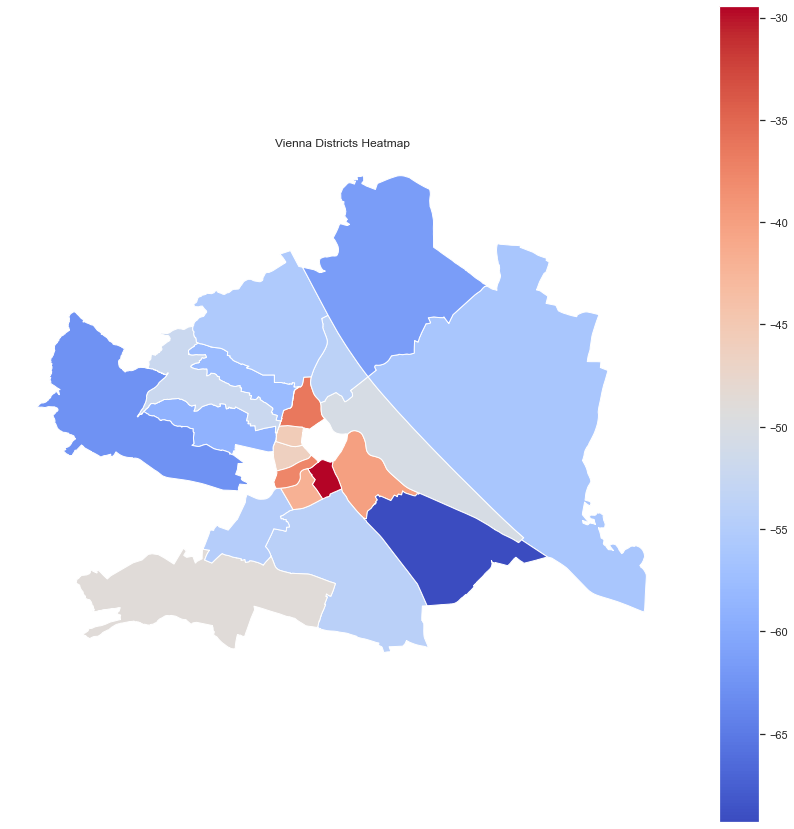

In [91]:
# Plot VIE map with the coefficients
plt.figure(figsize=(12, 6))
vienna_districts_merge.plot(column='Coefficients', cmap='coolwarm', legend=True)
plt.title('Vienna Districts Heatmap')
plt.axis('off') 
plt.show()

### Possible next steps

One next step is building other regression models instead of an OLS. 

Other approaches could include building a neural network to try and predict the price. As this is mostly matrice data, LSTM or transformer models could work. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3599cbdb-2e1a-478a-b720-a34a891e5ea0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>